# Estudio de la criminalidad en México, año 2017

In [2]:
# Librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statistics
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder
# import sklearn.preprocessing
from sklearn import preprocessing

# Para hacer curvas de aprendizaje
from sklearn.model_selection import learning_curve

# Para hacer curvas de validación
from sklearn.model_selection import validation_curve

plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')
%matplotlib inline

Los datos a utilizar fueron obtenidos de la base de datos de la **Encuesta Nacional de Victimización y Percepción sobre Seguridad Pública (ENVIPE) 2018**, del Instituto Nacional de Estadística y Geografía (INEGI). La tabla de datos a utilizar es la "Tabla del módulo sobre victimización" **(TMod_Vic)**, que se puede encontrar [aquí](https://www.inegi.org.mx/app/buscador/default.html?q=envipe+2018).


In [3]:
# Lectura del archivo
victimas = pd.DataFrame(pd.read_csv('TMod_Vic.csv'))

# Muestra los primeros 5 renglones del archivo
victimas.head(5)

,"ID_VIV,C,10","ID_HOG,C,13","ID_PER,C,16","ID_DEL,C,21","UPM,C,7","VIV_SEL,C,7","HOGAR,C,5","ND_TIPO,C,7","TD_TIPO,C,7","BPCOD,C,5",...,"BP6_1,C,5","BP6_2,C,5","BP6_3,C,5","BP7_1,C,5","FAC_DEL,C,7","FAC_DEL_AM,C,10","DOMINIO,C,7","ESTRATO,C,7","EST_DIS,C,7","UPM_DIS,C,7"
0,100721.03,0100721.03.01,0100721.03.01.03,0100721.03.01.03.02.2,100721,3,1,2,5,2,...,NaN,NaN,NaN,NaN,201,201.0,U,3,2,79
1,100721.03,0100721.03.01,0100721.03.01.03,0100721.03.01.03.01.1,100721,3,1,1,1,1,...,NaN,NaN,NaN,NaN,201,201.0,U,3,2,79
2,100721.03,0100721.03.01,0100721.03.01.03,0100721.03.01.03.02.3,100721,3,1,3,5,2,...,NaN,NaN,NaN,NaN,201,201.0,U,3,2,79
3,100721.03,0100721.03.01,0100721.03.01.03,0100721.03.01.03.11.1,100721,3,1,1,1,11,...,NaN,NaN,NaN,NaN,602,602.0,U,3,2,79
4,100721.03,0100721.03.01,0100721.03.01.03,0100721.03.01.03.07.1,100721,3,1,1,1,7,...,NaN,NaN,NaN,NaN,602,602.0,U,3,2,79


In [4]:
# Ver los tipos de datos que Pandas ha reconocido al leer
victimas.dtypes

ID_VIV,C,10        float64
ID_HOG,C,13         object
ID_PER,C,16         object
ID_DEL,C,21         object
UPM,C,7              int64
VIV_SEL,C,7          int64
HOGAR,C,5            int64
ND_TIPO,C,7          int64
TD_TIPO,C,7          int64
BPCOD,C,5            int64
R_SEL,C,5            int64
RESUL_H,C,7         object
SEXO,C,4             int64
EDAD,C,4             int64
AREAM_OCU,C,9      float64
BP1_1,C,5            int64
BP1_2C,C,6           int64
BP1_3C,C,6           int64
BP1_4,C,5            int64
BP1_5,C,5            int64
BP1_6,C,5          float64
BP1_7,C,5          float64
BP1_8,C,5          float64
BP1_9,C,5          float64
BP1_10_1,C,8       float64
BP1_10_2,C,8       float64
BP1_10_9,C,8       float64
BP1_11,C,6         float64
BP1_12_1,C,8       float64
BP1_12_2,C,8       float64
                    ...   
BP3_1_02,C,8       float64
BP3_1_03,C,8       float64
BP3_1_04,C,8       float64
BP3_1_05,C,8       float64
BP3_1_06,C,8       float64
BP3_1_07,C,8       float64
B

# Selección de las varibales de interés:

Se consulta el [catálogo de variables](https://www.inegi.org.mx/app/biblioteca/ficha.html?upc=702825104818) provisto por los autores, y las consideradas más relevantes se muestran a continuación:

**BPCOD,C,5:**
Códigos para delitos (Ésta será la variable de salida, o "target").

**AREAM_OCU,C,9:**
Área metropolitana de ocurrencia (del delito).

**BP1_1,C,5:**
¿En qué mes del 2017 sucedió (el delito)?.

**BP1_2C,C,6:**
¿En qué Estado sucedió (el delito).

**BP1_4,C,5:**
¿Aproximadamente a qué hora se cometió (el delito)?.

**BP1_5,C,5:**
¿En qué lugar sucedió (el delito)?.

In [4]:
# Creación de un DataFrame con las columnas de interés
datos = victimas[['BPCOD,C,5','SEXO,C,4','EDAD,C,4','AREAM_OCU,C,9','BP1_1,C,5','BP1_2C,C,6','BP1_4,C,5','BP1_5,C,5']]
datos.head(5)

,"BPCOD,C,5","SEXO,C,4","EDAD,C,4","AREAM_OCU,C,9","BP1_1,C,5","BP1_2C,C,6","BP1_4,C,5","BP1_5,C,5"
0,2,1,31,14.0,4,1,4,1
1,1,1,31,14.0,10,1,3,1
2,2,1,31,14.0,5,1,2,1
3,11,1,31,14.0,5,1,3,1
4,7,1,31,14.0,6,1,1,1


In [6]:
# Ver los tipos de variables
datos.dtypes

BPCOD,C,5          int64
SEXO,C,4           int64
EDAD,C,4           int64
AREAM_OCU,C,9    float64
BP1_1,C,5          int64
BP1_2C,C,6         int64
BP1_4,C,5          int64
BP1_5,C,5          int64
dtype: object

In [7]:
# Conteo de datos por atributo
datos.count()

# BPCOD,C,5       #CÓDIGOS PARA DELITOS (Ésta será la variable de salida)
# AREAM_OCU,C,9   #Área metropolitana de ocurrencia
# BP1_1,C,5       #¿En qué mes del 2017 sucedió el (DELITO)?  
# BP1_2C,C,6      #¿En qué Estado sucedió el (DELITO)
# BP1_4,C,5       #¿Aproximadamente a qué hora se cometió el (DELITO)?
# BP1_5,C,5       #¿En qué lugar sucedió el (DELITO)?

BPCOD,C,5        46674
SEXO,C,4         46674
EDAD,C,4         46674
AREAM_OCU,C,9    28084
BP1_1,C,5        46674
BP1_2C,C,6       46674
BP1_4,C,5        46674
BP1_5,C,5        46674
dtype: int64

Para trabajar con mayor facilidad, se cambiará el nombre de las variables

In [5]:
#Creación de nuevas columnas
datos[['DELITO']] = datos[['BPCOD,C,5']]
datos[['SEXO']] = datos[['SEXO,C,4']]
datos[['EDAD']] = datos[['EDAD,C,4']]
datos[['AREAM']] = datos[['AREAM_OCU,C,9']]
datos[['MES']] = datos[['BP1_1,C,5']]
datos[['ESTADO']] = datos[['BP1_2C,C,6']]
datos[['HORA']] = datos[['BP1_4,C,5']]
datos[['LUGAR']] = datos[['BP1_5,C,5']]

datos.head()

C:\Users\braya\Anaconda2\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,"BPCOD,C,5","SEXO,C,4","EDAD,C,4","AREAM_OCU,C,9","BP1_1,C,5","BP1_2C,C,6","BP1_4,C,5","BP1_5,C,5",DELITO,SEXO,EDAD,AREAM,MES,ESTADO,HORA,LUGAR
0,2,1,31,14.0,4,1,4,1,2,1,31,14.0,4,1,4,1
1,1,1,31,14.0,10,1,3,1,1,1,31,14.0,10,1,3,1
2,2,1,31,14.0,5,1,2,1,2,1,31,14.0,5,1,2,1
3,11,1,31,14.0,5,1,3,1,11,1,31,14.0,5,1,3,1
4,7,1,31,14.0,6,1,1,1,7,1,31,14.0,6,1,1,1


In [6]:
#Eliminación de las viejas columnas
datos = datos.drop(columns=['BPCOD,C,5','SEXO,C,4','EDAD,C,4','AREAM_OCU,C,9','BP1_1,C,5','BP1_2C,C,6','BP1_4,C,5','BP1_5,C,5'])

datos.head(15)

,DELITO,SEXO,EDAD,AREAM,MES,ESTADO,HORA,LUGAR
0,2,1,31,14.0,4,1,4,1
1,1,1,31,14.0,10,1,3,1
2,2,1,31,14.0,5,1,2,1
3,11,1,31,14.0,5,1,3,1
4,7,1,31,14.0,6,1,1,1
5,5,1,31,14.0,4,1,3,1
6,2,1,31,14.0,12,1,4,1
7,2,1,31,14.0,10,1,3,1
8,2,1,31,14.0,10,1,9,4
9,9,1,31,14.0,4,1,1,2


Los posibles valores para cada variable simbolizan:

**DELITO:**
01- Robo total de vehículo
02- Robo de accesorios, refacciones o herramientas de vehículo
03- Pinta de barda en su casa, vandalismo
04- Robo a casa/departamento
05- Robo o asalto en la calle o transporte público
06- Robo distinto a la anterior
07- Fraude bancario, clonacion de cuentas de banco, fraude.
08- Fraude al consumidor
09- Extorsión telefonica
10- Amenazas verbales
11- Ataques violentos
12- Secuestro 
13- Hostigamiento Sexual
14- Violacion Sexual
15- Delitos distintos a los anteriores

**SEXO:**
1- Hombre
2- Mujer

**MES:**
01- Enero
02- Febrero
03- Marzo
04- Abril
05- Mayo
06- Junio
07- Julio
08- Agosto
09- Septiembre
10- Octubre
11- Noviembre
12- Diciembre
99- No sabe/ no responde

**ESTADO:**
01- Aguascalientes
02- Baja California 
03- Baja California Sur
04- Campeche 
05- Coahuila
06- Colima
07- Chiapas
08- Chihuahua
09- CDMX
10- Durango
11- Guanajuato
12- Guerrero
13- Hidalgo
14- Jalisco
15- Estado de México
16- Michoacán de Ocampo
17- Morelos
18- Nayarit
19- Nuevo León
20- Oaxaca
21- Puebla de Zaragoza
22- Querétaro
23- Quintana Roo
24- San Luis Potosi
25- Sinaloa
26- Sonora
27- Tabasco
28- Tamaulipas
29- Tlaxcala
30- Veracruz Llave
31- Yucatán
32- Zacatecas
99- No especificada

**HORA:**
1- En la mañana (de 06:01 a 12:00 hrs.)
2- En la tarde (de 12:01 a 18:00 hrs.)
3- En la noche (de 18:01 a 24:00 hrs.)
4- En la madrugada (de 00:01 a 06:00 hrs.)
9- No sabe/ no responde

**LUGAR:**
1- En la calle
2- En su casa
3- En su trabajo
4- En un negocio o establecimiento
5- En un lugar público
6- En el transporte público
7- En una carretera
8- Otro
9- No sabe/ no responde

Es necesario realizar una búsqueda de datos nulos o faltantes antes de continuar con el análisis

In [12]:
# Conteo de los datos nulos por columna
datos.isna().sum()

DELITO        0
SEXO          0
EDAD          0
AREAM     18590
MES           0
ESTADO        0
HORA          0
LUGAR         0
dtype: int64

La información faltante sobre el área metropolitana no puede ser reemplazada artificialmente, por lo que se decide eliminar ésta variable.

In [7]:
datos1 = datos.drop(columns=['AREAM','DELITO'])
#Se elimina también la columa 'DELITO' por tratarse de la variable objetivo o target. Así, datos1 representa la matriz de diseño

# Matriz de correlación
Se utilizará la matriz de correlación para elaborar un mapa de calor ('heatmap'), y con ello estudiar la correlación entre las variables


In [14]:
#Se utiliza la funcion corr() para hallar correlaciones entre las variables
datos1_corr = datos1.corr(method='pearson', min_periods=1)
#Se muestra la matriz de correlación
datos1_corr.head()

,SEXO,EDAD,MES,ESTADO,HORA,LUGAR
SEXO,1.000000,0.003658,0.013734,0.006944,-0.026451,0.016895
EDAD,0.003658,1.000000,0.038796,-0.016785,-0.004603,-0.003803
MES,0.013734,0.038796,1.000000,-0.003812,0.069750,0.008251
ESTADO,0.006944,-0.016785,-0.003812,1.000000,-0.026364,0.028488
HORA,-0.026451,-0.004603,0.069750,-0.026364,1.000000,-0.004096


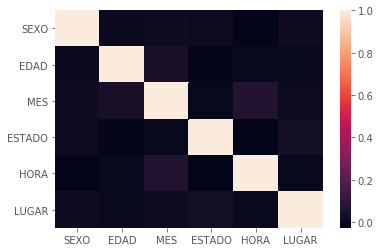

In [15]:
#Mapa de calor con las correlaciones
sb.heatmap( datos1_corr )

Aquí se observa que todas las variables están poco relacionadas entre sí.

In [16]:
#Conteo de los datos por sexo
datos1['SEXO'].value_counts(normalize=True)
# 1 - Hombre
# 2 - Mujer

2    0.5006
1    0.4994
Name: SEXO, dtype: float64

In [17]:
#Conteo de los datos por mes (en porcentajes)
datos1['MES'].value_counts(normalize=True)

12    0.114582
11    0.108390
6     0.091721
10    0.081801
3     0.078888
5     0.077581
2     0.077474
9     0.075995
8     0.073638
7     0.069161
1     0.061233
4     0.060933
99    0.028603
Name: MES, dtype: float64

In [13]:
# Conteo de datos por estado (en porcentaje)
datos['ESTADO'].value_counts(normalize=True)
# 9 - CDMX
# 21 - Puebla
# 15 - Edo. de México

9     0.112547
21    0.053027
15    0.051592
2     0.041201
14    0.041008
17    0.039380
27    0.037366
22    0.036230
25    0.032588
12    0.031238
8     0.031174
19    0.030038
16    0.029031
1     0.028067
26    0.027510
23    0.027339
6     0.025496
11    0.025239
29    0.024832
3     0.024725
28    0.024575
5     0.023632
31    0.023525
10    0.023525
7     0.023225
4     0.020890
30    0.019540
13    0.019111
20    0.018640
32    0.018297
24    0.017483
18    0.016862
99    0.001071
Name: ESTADO, dtype: float64

In [18]:
# Conteo de datos por delito (en porcentaje)
datos['DELITO'].value_counts(normalize=True)

2     0.165788
5     0.145541
3     0.143377
9     0.137143
4     0.133200
10    0.059926
7     0.054099
8     0.042422
6     0.039165
1     0.029674
11    0.022454
13    0.022218
15    0.001864
14    0.001757
12    0.001371
Name: DELITO, dtype: float64

# Codificación ONE-HOT

In [8]:
# enc = OneHotEncoder()
# datos_dummies = pd.get_dummies(datos1)
# datos_dummies.head()

# Instancia
# Codificar etiquetas con valores entre 0 y {n_clases - 1}.
le = preprocessing.LabelEncoder()

# Ajuste y transformación
# usar df.apply() para aplicar le.fit_transform a todas las columnas
datos2 = datos1.apply(le.fit_transform)
datos2.head()


,SEXO,EDAD,MES,ESTADO,HORA,LUGAR
0,0,13,3,0,3,0
1,0,13,9,0,2,0
2,0,13,4,0,1,0
3,0,13,4,0,2,0
4,0,13,5,0,0,0


In [9]:
# Instancia
enc = preprocessing.OneHotEncoder()

# Ajuste
enc.fit(datos2)

# Transformación
onehotlabels = enc.transform(datos2).toarray()

onehotlabels.shape

C:\Users\braya\Anaconda2\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(46674, 142)

In [10]:
datos1.shape

(46674, 6)

'onehotlabels' es un array con 142 atributos, a diferencia de los 6 de 'datos1'. 

In [11]:
onehotlabels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

# Clasificación mediante regresión logística multinomial

**División de los datos en 'entrenamiento' y 'prueba', destinando el 70% y 30%, respectivamente**

In [12]:
train_x, test_x, train_y, test_y = train_test_split(onehotlabels,
datos['DELITO'], train_size=0.7)

C:\Users\braya\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [13]:
# Modelo
# mult_log_reg = LogisticRegression(multi_class='multinomial', solver='newton-cg', penalty='l2', tol=1e-4, C=C, max_iter=N, warm_start=False)
mult_log_reg = LogisticRegression( penalty='l2', C=1e-1)

# Entrenamiento
mul_lr = mult_log_reg.fit(train_x, train_y)


C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


**Obtención de la precisión (Accuracy)**

Para medir la efectividad del método, se utilizará el indicadorr $\textit{Accuracy}$, que representa la fracción de predicciones acertadas respecto al total de datos de prueba, y viene dado por:

$Accuracy(y,\hat{y})=\frac{1}{N} \sum_{i=0}^{N-1} 1\{y_i = \hat{y}_i \}$

donde $1\{x\}$ es la función indicador (igual a la unidad si $x$ es una proposición verdadera, y 0 en el caso contrario).

In [26]:
# Multinomial Logistic regression Train Accuracy 
Acc_train = metrics.accuracy_score(train_y, mult_log_reg.predict(train_x))
# Multinomial Logistic regression Test Accuracy
Acc_test = metrics.accuracy_score(test_y, mult_log_reg.predict(test_x))

print("Regresión Logística Multinomial, Accuracy en entrenamiento: "+ str(Acc_train))
print("Regresión Logística Multinomial, Accuracy en prueba: "+ str(Acc_test))

Regresión Logística Multinomial, Accuracy en entrenamiento: 0.453092957056717
Regresión Logística Multinomial, Accuracy en prueba: 0.44976076555023925


# Curvas de aprendizaje

In [69]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize=(10, 10))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Ejemplos de entrenamiento")
    plt.ylabel("Puntaje")
    
    ####################################################################
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, 
        X, y, 
        cv=cv, 
        n_jobs=n_jobs, 
        train_sizes=train_sizes
    )
    ####################################################################
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(
        train_sizes, 
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std, 
        alpha=0.1,
        color="r"
    )
    plt.fill_between(
        train_sizes, 
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std, 
        alpha=0.1, 
        color="g"
    )
    plt.plot(
        train_sizes, 
        train_scores_mean, 
        'o-', 
        color="r",
        label="Puntaje de entrenamiento"
    )
    plt.plot(
        train_sizes, 
        test_scores_mean, 
        'o-', 
        color="g",
        label="Puntaje en validación cruzada"
    )
    plt.legend(loc='lower right')
    return plt

C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

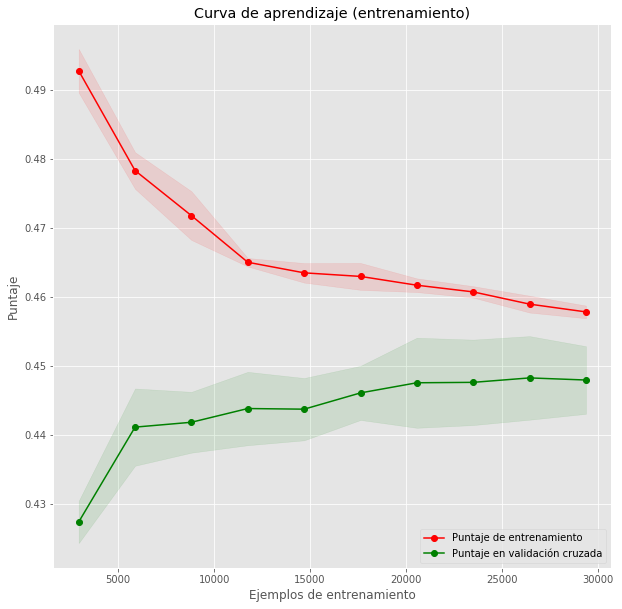

In [71]:
plt = plot_learning_curve(
    mult_log_reg, 
    "Curva de aprendizaje (entrenamiento)", 
    train_x, 
    train_y, 
#     ylim=(0.2, 0.4), 
    cv=10, 
    n_jobs=1
)

C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\braya\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

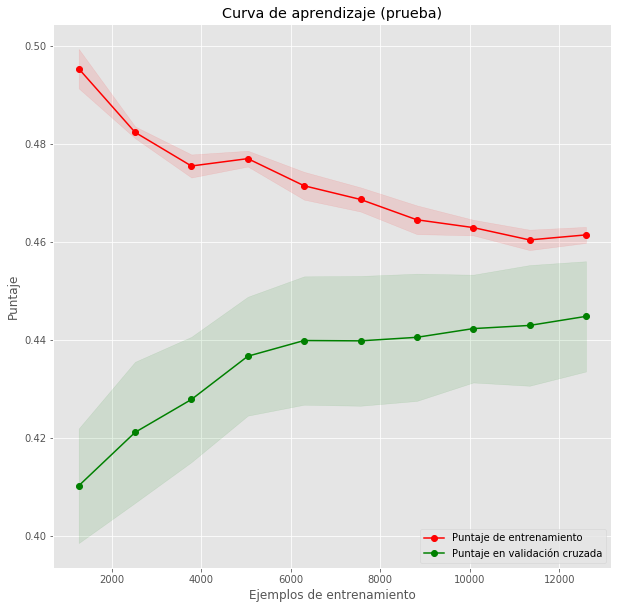

In [72]:
plt = plot_learning_curve(
    mult_log_reg, 
    "Curva de aprendizaje (prueba)", 
    test_x, 
    test_y, 
    cv=10, 
    n_jobs=1
)

# Matriz de confusión

In [15]:
cm = metrics.confusion_matrix(test_y, mult_log_reg.predict(test_x))
print(cm)

[[   0  201   20   24  141    1   19    5   12    0    0    0    1    0
     0]
 [   0 1322  124  162  523    5   97   10   71    0    0    0    1    0
     0]
 [   0  383  861  464  143    1   24    7  201    1    0    0    0    0
     0]
 [   0    0  455  938    0    0    0    0  431    0    0    0    0    0
     0]
 [   0  516    1    0 1401    4   59   17   41    4    0    0    1    0
     0]
 [   0   56   67  178   42   47   49    9  103    2    0    0    0    0
     0]
 [   0   58   10   20   50    8  425   58  102    1    0    0    0    0
     0]
 [   0   32   19   56   45    8  197   72  170    2    0    0    2    0
     0]
 [   0  123   92  260  132    8   43   12 1227    4    0    0    0    0
     0]
 [   0  200   32  140  216    8   25   14  196    4    0    0    1    0
     0]
 [   0  103   13   36  100    5    7    7   33    1    0    0    0    0
     0]
 [   0    9    0    0    8    0    0    0    1    1    0    0    0    0
     0]
 [   0   73    4   13  174    1   13    

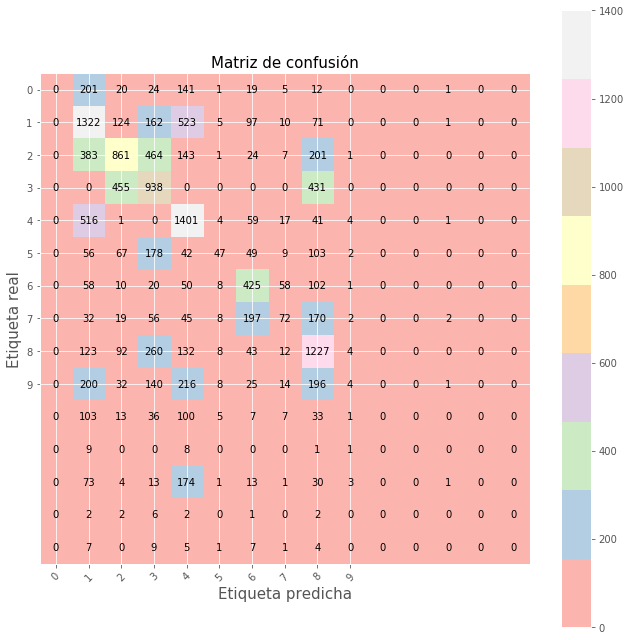

In [24]:
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Matriz de confusión', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Etiqueta real', size = 15)
plt.xlabel('Etiqueta predicha', size = 15)
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

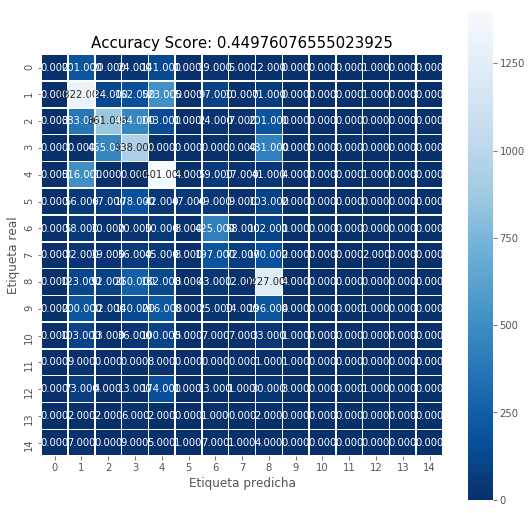

In [27]:
plt.figure(figsize=(9,9))
sb.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Etiqueta real');
plt.xlabel('Etiqueta predicha');
all_sample_title = 'Accuracy Score: {0}'.format(Acc_test)
plt.title(all_sample_title, size = 15);

# Conclusiones